## Simple Linear Regression

Accuracy: 0.9339267956950106


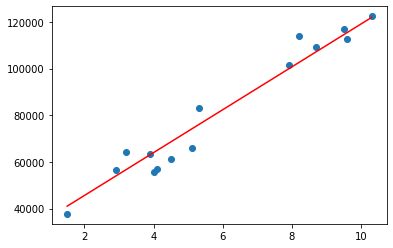

In [ ]:
# Bước 1: đọc dữ liệu từ file data
import numpy
import pandas
data_SLR = pandas.read_csv("/content/Salary_Data.csv")
data_SLR_arr = data_SLR.to_numpy()

# Bước 2: phân chia data thành tập huấn luyện và tập kiểm tra ==> sử dụng K-fold cross validation
from sklearn.model_selection import KFold
kfold = KFold(n_splits=2, shuffle=True, random_state=0)
SLR_train_i, SLR_test_i = kfold.split(data_SLR)
SLR_train_i = SLR_train_i[0]
SLR_test_i = SLR_test_i[0]
SLR_in_train, SLR_in_test = data_SLR_arr[SLR_train_i, 0].reshape(-1, 1), data_SLR_arr[SLR_test_i, 0].reshape(-1, 1)
SLR_out_train, SLR_out_test = data_SLR_arr[SLR_train_i, 1].reshape(-1, 1), data_SLR_arr[SLR_test_i, 1].reshape(-1, 1)

# Bước 3: chuẩn hóa dữ liệu (nếu cần)

# Bước 4: huấn luyện mô hình
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model = model.fit(SLR_in_train, SLR_out_train)

# Bước 5: predict và tính accuracy trên mô hình vừa huấn luyện
from sklearn.model_selection import cross_val_score
score = cross_val_score(model, SLR_in_test, SLR_out_test, cv=kfold)
print("Accuracy:", numpy.mean(score))

# Bước 6: trực quan hóa dữ liệu
from matplotlib import pyplot as plt
plt.scatter(SLR_in_test, SLR_out_test)
plt.plot(SLR_in_test, model.predict(SLR_in_test), color='red')
plt.show()

## Multiple Linear Regression

In [ ]:
# Bước 1: đọc dữ liệu từ file data
import numpy
import pandas
data_MLR = pandas.read_csv("/content/50_Startups.csv")
data_MLR = pandas.concat([data_MLR, pandas.get_dummies(data_MLR[['State']])], axis=1)
data_MLR = data_MLR.drop(['State'], axis=1)
data_MLR_arr = data_MLR.to_numpy()

# Bước 2: phân chia data thành tập huấn luyện và tập kiểm tra ==> sử dụng K-fold cross validation
from sklearn.model_selection import KFold
kfold = KFold(n_splits=2, shuffle=True, random_state=0)
MLR_train_i, MLR_test_i = kfold.split(data_MLR)
MLR_train_i = MLR_train_i[0]
MLR_test_i = MLR_test_i[0]
MLR_in_train = pandas.DataFrame(data_MLR_arr[MLR_train_i, 0].reshape(-1, 1))
MLR_in_test = pandas.DataFrame(data_MLR_arr[MLR_test_i, 0].reshape(-1, 1))
for i in [1, 2, 4, 5, 6]:
    MLR_in_train = pandas.concat((MLR_in_train, pandas.DataFrame(data_MLR_arr[MLR_train_i, i].reshape(-1, 1))), axis=1, ignore_index=True)
    MLR_in_test = pandas.concat((MLR_in_test, pandas.DataFrame(data_MLR_arr[MLR_test_i, i].reshape(-1, 1))), axis=1, ignore_index=True)
MLR_out_train = pandas.DataFrame(data_MLR_arr[MLR_train_i, 3].reshape(-1, 1))
MLR_out_test = pandas.DataFrame(data_MLR_arr[MLR_test_i, 3].reshape(-1, 1))

# Bước 3: chuẩn hóa dữ liệu (nếu cần)

# Bước 4: huấn luyện mô hình
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model = model.fit(MLR_in_train, MLR_out_train)

# Bước 5: predict và tính accuracy trên mô hình vừa huấn luyện
from sklearn.model_selection import cross_val_score
score = cross_val_score(model, MLR_in_test, MLR_out_test, cv=kfold)
print("Accuracy:", numpy.mean(score))

Accuracy: 0.8653091869809857
